# MULTICLASS CLASSIFICATION TEST AND ANALYSIS

**Append the directory of the m_learn package to the system path**

In [1]:
from config import *
append_path('../../')

**Import necessary packages and modules**

In [2]:
import numpy as np
np.random.seed(0)
import pandas as pd
from m_learn.naive_bayes_classifier import gaussian_NB_classifier
from m_learn.utility.data_preprocessing import mesh_data
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 1. Multiclass classification test

### 1.1 Create 3 clusters/classes of 2D data

**Create x values of the 3 clusters**

In [3]:
# sigma of the random distribution
sigma = 4
# size of each class
cls_size = 500
# create x, y values of first class/clusters
x11 = np.random.normal(20, sigma, cls_size)
x21 = np.random.normal(20, sigma, cls_size)
# create x, y values of second class/clusters
x12 = np.random.normal(45, sigma, cls_size)
x22 = np.random.normal(35, sigma, cls_size)
# create x, y values of third class/clusters
x13 = np.random.normal(15, sigma, cls_size)
x23 = np.random.normal(50, sigma, cls_size)

**Concatenate the feature 1(x1) & feature 2(x2) values of the 3 classes/clusters**

In [4]:
x1 = np.concatenate([x11,x12,x13])
x2 = np.concatenate([x21,x22,x23])

**Create the labels of the 3 clusters**

In [5]:
y = [0 for i in range(cls_size)] + [1 for i in range(cls_size)] + [2 for i in range(cls_size)]

**Store the xy data in a pandas dataframe**

In [6]:
data = pd.DataFrame({"x1": x1, "x2": x2, "y":y})
data = data.sample(frac=1).reset_index(drop=True)
data.head(20)

,x1,x2,y
0,45.646237,29.068467,1
1,6.956871,45.315239,2
2,40.729032,42.208969,1
3,26.878357,19.388902,0
4,22.573258,19.110092,0
5,18.549035,16.953706,0
6,8.336176,57.838248,2
7,26.131117,10.521652,0
8,16.418134,20.655714,0
9,19.089569,49.483386,2


### 1.2 Scatter plot of the different classes

**Extract the datapoints of the 3 clusters/classes**

In [7]:
class1 = data[data["y"] == 0]
class2 = data[data["y"] == 1]
class3 = data[data["y"] == 2]

**Scatter plot of the 3 clusters/classes**

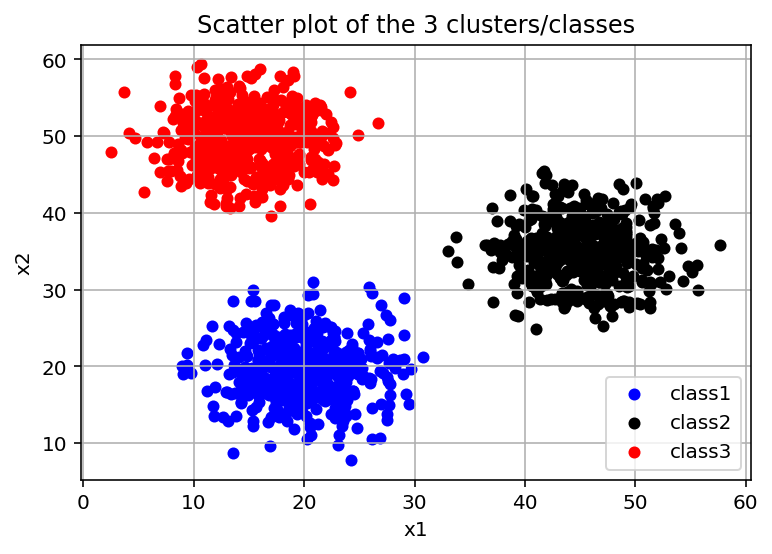

In [8]:
plt.scatter(class1["x1"], class1["x2"], c = 'b', linewidths=0.01, label = 'class1')
plt.scatter(class2["x1"], class2["x2"], c = 'k', linewidths=0.01, label = 'class2')
plt.scatter(class3["x1"], class3["x2"], c = 'r', linewidths=0.01, label = 'class3')
plt.legend(loc='lower right')
plt.title("Scatter plot of the 3 clusters/classes")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.show()

### 1.3 Train classifier using the data

**Create and fit a Naive Bayes classifier**

In [9]:
# features of the model
features = ['x1', 'x2']
# output of the model
output = 'y'
# create and train the model
model1 = gaussian_NB_classifier()
model1.fit(data, features, output, verbose = True)

Extracted the unique classes from the output column
Calculated the class frequency of each class
Calculated and tabulated the mean data
Calculated and tabulated the std data
Finished fitting the model 



**Compute predictions and calculate accuracy**

In [10]:
prediction = model1.predict(data)
print("accuracy: ", accuracy_score(data[output], prediction))

accuracy:  1.0


### 1.4 Visualize the decision boundary using mesh plot

**Create mesh points**

In [11]:
# step in mesh plot
mesh_step = 0.5
# extract the xx & yy matrices and the flattened mesh points
xx, yy, mesh_points = mesh_data(data, features, mesh_step, boudary_extension=5)

**Compute predictions**

In [12]:
# compute predictions 
predictions1 = model1.predict(mesh_points)
# reshape predictions so that it fits the meshplot
predictions1 = predictions1.reshape(xx.shape)

**Mesh plot**

<ipython-input-13-cb54e0b581ae>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, predictions1, cmap=plt.cm.Paired)


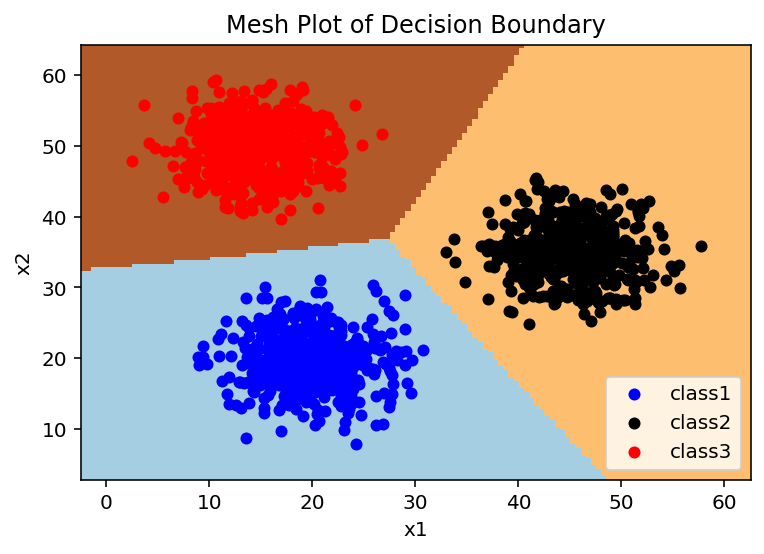

In [13]:
plt.pcolormesh(xx, yy, predictions1, cmap=plt.cm.Paired)
plt.scatter(class1["x1"], class1["x2"], c = 'b', linewidths=0.01, label = 'class1')
plt.scatter(class2["x1"], class2["x2"], c = 'k', linewidths=0.01, label = 'class2')
plt.scatter(class3["x1"], class3["x2"], c = 'r', linewidths=0.01, label = 'class3')
plt.legend(loc='lower right')
plt.title("Mesh Plot of Decision Boundary")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

## 2. Multiclass classification using the iris data

### 2.1 Load and preprocess the data

**Load the iris data**

In [14]:
iris = datasets.load_iris()

**Store columns of features and output in a pandas dataframe**

In [15]:
# features of the model
features = iris.feature_names
# store the feature columns in a pandas datafram
data = pd.DataFrame(iris.data, columns=features)
# store the column of encoded labels in a pandas dataframe
data["encoded_labels"] = iris.target
# shuffle the data
data = data.sample(frac=1, random_state=1).reset_index(drop=True)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),encoded_labels
0,5.8,4.0,1.2,0.2,0
1,5.1,2.5,3.0,1.1,1
2,6.6,3.0,4.4,1.4,1
3,5.4,3.9,1.3,0.4,0
4,7.9,3.8,6.4,2.0,2


**Create a column for string labels**

In [16]:
output = "labels"
data[output] = data["encoded_labels"].replace([0,1,2], iris.target_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),encoded_labels,labels
0,5.8,4.0,1.2,0.2,0,setosa
1,5.1,2.5,3.0,1.1,1,versicolor
2,6.6,3.0,4.4,1.4,1,versicolor
3,5.4,3.9,1.3,0.4,0,setosa
4,7.9,3.8,6.4,2.0,2,virginica


**Do a train test split**

In [17]:
train_data, test_data = train_test_split(data, test_size = 0.266, random_state = 1)

### 2.2 Create and fit a Gaussian Naive Bayes classifier and access the performance

**Create and fit Gaussian NB classifier**

In [18]:
model_iris = gaussian_NB_classifier()
model_iris.fit(train_data, features, output, verbose = True)

Extracted the unique classes from the output column
Calculated the class frequency of each class
Calculated and tabulated the mean data
Calculated and tabulated the std data
Finished fitting the model 



**Compute predictions and calculate accuracy**

In [19]:
predictions_iris = model_iris.predict(test_data)

In [20]:
print("Accuracy of Gaussian NB model:", accuracy_score(test_data[output], predictions_iris))

Accuracy of Gaussian NB model: 0.925
